In [13]:
# download file csv from kaggle using colab

In [8]:
from google.colab import files

kaggle_json_path = "/content/kaggle.json"

files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving Europe Sales Records.csv to Europe Sales Records.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
import pandas as pd

In [11]:
europe_sales = pd.read_csv('Europe Sales Records.csv')

In [14]:
europe_sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78


In [18]:
# read file from tableau

In [19]:
from bs4 import BeautifulSoup
import requests

In [21]:
# URL of the webpage we want to scrape

url = 'https://public.tableau.com/app/profile/mustafa.bayar/viz/EuropeSalesDashboard_17076655998810/Dashboard1?publish=yes'

In [22]:
# Sending HTTP request to the specified URL and save the response from server in a response object called response

response = requests.get(url)

In [23]:
# Creating BeautifulSoup object and specifying the parser library at the same time

soup = BeautifulSoup(response.text, 'html.parser')

In [24]:
# Now, let's say we want all the URLs within the webpage. `a` tags are used for links in HTML. So, we should find all the `a` tags.

links = soup.find_all('a')

In [25]:
# Here, I'm printing all the URLs we just scraped

for link in links:
    print(link.get('href'))

In [29]:
import pandas as pd

In [30]:
europe_sales['product_type'] = europe_sales['Item Type'].apply(lambda x: str(x).split(' ')[0].lower() if pd.notnull(x) else 'unknown')

In [31]:
europe_sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,product_type
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,beverages
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88,clothes
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44,cereal
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50,office
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78,fruits


In [32]:
import numpy as np
import pandas as pd

In [33]:
# import the required libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Let's first parse the 'Order Date' column to datetime
europe_sales['Order Date'] = pd.to_datetime(europe_sales['Order Date'])

In [35]:
# Extract the year and month from 'Order Date'

europe_sales["Year"] = europe_sales["Order Date"].dt.year
europe_sales["Month"] = europe_sales["Order Date"].dt.month

In [36]:
# Group by Year and Month and sum the Total Revenue for Monthly Sales Visualization

monthly_sales = europe_sales.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

In [37]:
# Group by Country and sum Total Profit, Total Revenue and Total Cost for Countries KPIs Visualization

country_kpi = europe_sales.groupby('Country').agg({
    'Total Profit': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Units Sold': 'sum'
}).reset_index()

In [38]:
country_kpi.head()

,Country,Total Profit,Total Revenue,Total Cost,Units Sold
0,Albania,10490706.02,32224853.87,21734147.85,90608
1,Andorra,15410036.63,47756693.17,32346656.54,185686
2,Armenia,9422353.18,37519840.21,28097487.03,150665
3,Austria,10027509.64,35740871.49,25713361.85,145573
4,Belarus,11852421.05,34236260.77,22383839.72,153432


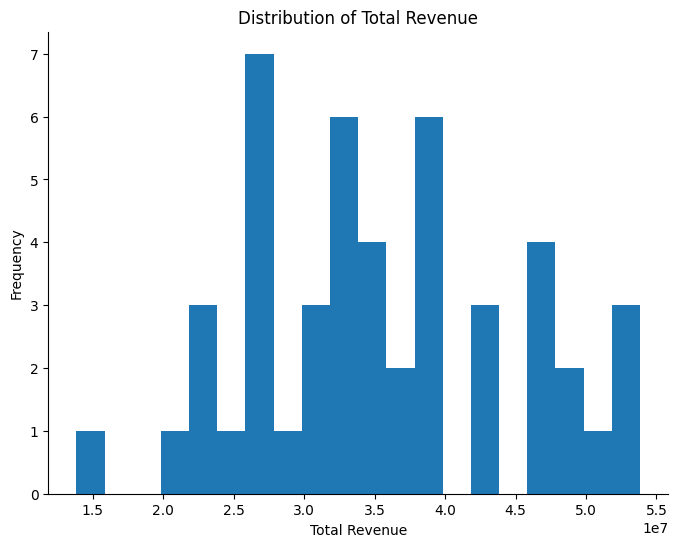

In [45]:
# @title Total Revenue

import pandas as pd
from matplotlib import pyplot as plt

# Assuming country_kpi is a DataFrame containing data

# Plot histogram of 'Total Revenue' column
plt.figure(figsize=(8, 6))  # Set figure size for better readability
country_kpi['Total Revenue'].plot(kind='hist', bins=20, title='Distribution of Total Revenue')

# Hide top and right spines
ax = plt.gca()  # Get the current Axes instance
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Set labels for x and y axes
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

# Show plot
plt.show()


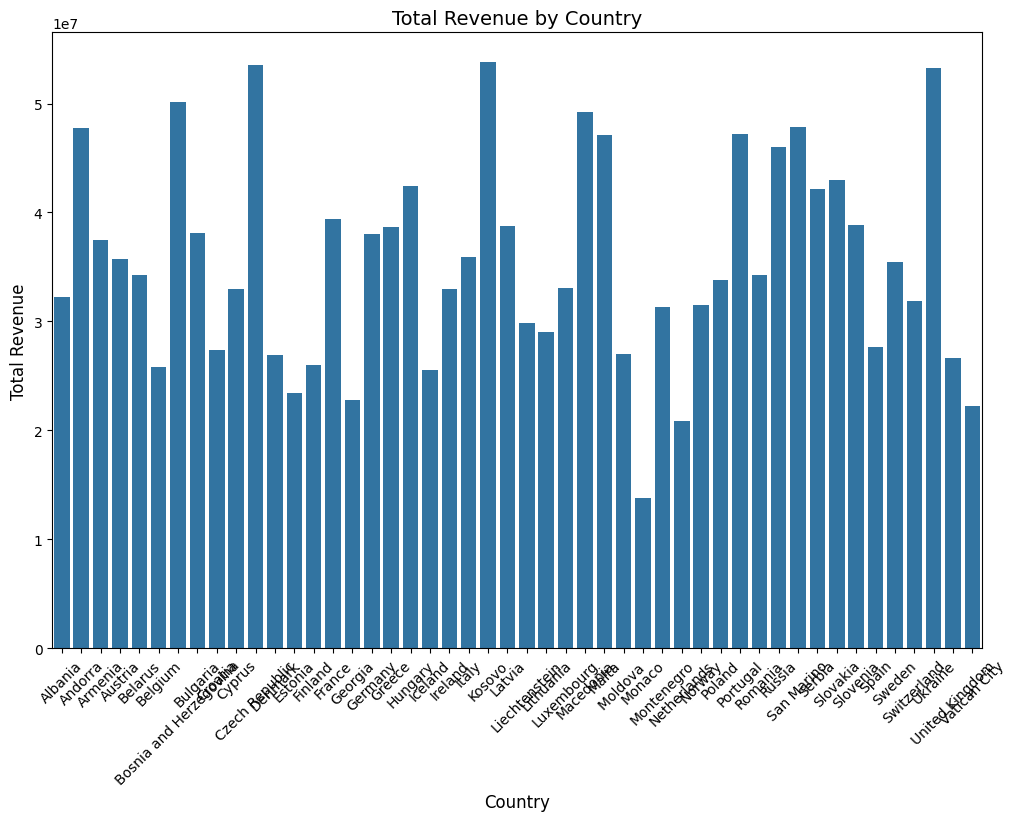

In [43]:
# @title Total Revenue by Country

# Increase figure size
plt.figure(figsize=(12, 8))

# Create bar plot
sns.barplot(x="Country", y="Total Revenue", data=country_kpi)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set axis labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Total Revenue by Country', fontsize=14)

# Show plot
plt.show()

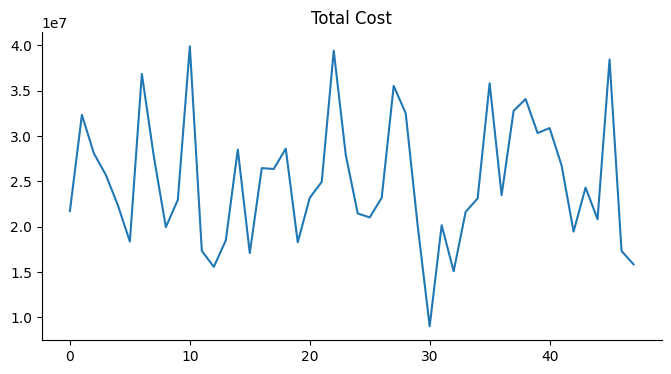

In [41]:
# @title Total Cost

from matplotlib import pyplot as plt
country_kpi['Total Cost'].plot(kind='line', figsize=(8, 4), title='Total Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

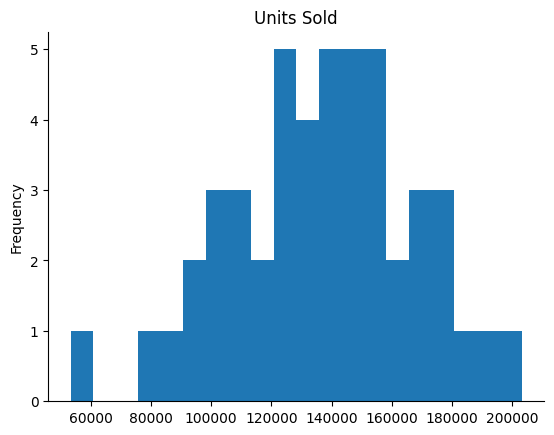

In [40]:
# @title Units Sold

from matplotlib import pyplot as plt
country_kpi['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

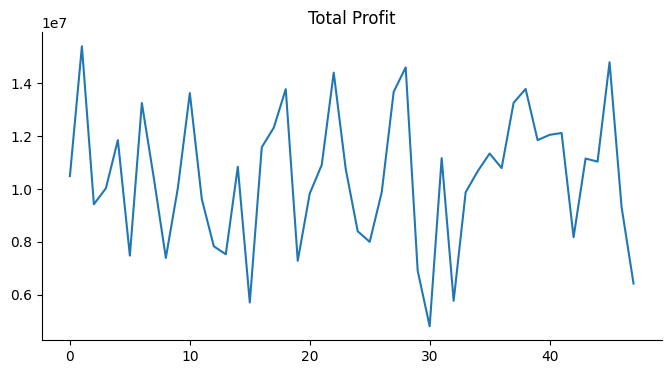

In [39]:
# @title Total Profit

from matplotlib import pyplot as plt
country_kpi['Total Profit'].plot(kind='line', figsize=(8, 4), title='Total Profit')
plt.gca().spines[['top', 'right']].set_visible(False)